# softmax回归的简洁实现

通过深度学习框架的高级API能够使实现
softmax
回归变得更加容易

In [1]:
import torch
from torch import nn
from d2l import torch as d2l
from torchvision.transforms import transforms
import torchvision
from torch.utils import data

batch_size = 256

In [2]:
# 在windows上 num_workers只能设置为0 如果在Linux系统中 可以直接调用d2l.load_data_fashion_mnist
def load_data_fashion_mnist(batch_size, resize=None):
    """Download the Fashion-MNIST dataset and then load it into memory.

    Defined in :numref:`sec_fashion_mnist`"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=0),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=0))

In [3]:
train_iter, test_iter = load_data_fashion_mnist(batch_size)

Softmax回归的输出层是一个全连接层

In [4]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

在交叉熵损失函数中传递未规范化的预测，并同时计算softmax及其对数

In [5]:
loss = nn.CrossEntropyLoss(reduction='none')

使用学习率为0.1的小批量随机梯度下降作为优化算法

In [6]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

调用
之前
定义的训练函数来训练模型

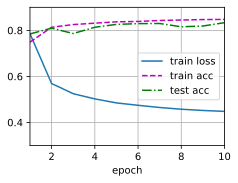

In [7]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)